In [ ]:
# Célula 1: Imports
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalização
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Adiciona canal (necessário para CNNs)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Dividir em treino/validação
x_val_full = x_train[-10000:]
y_val_full = y_train[-10000:]
x_train_full = x_train[:-10000]
y_train_full = y_train[:-10000]

# Para under_model: usar apenas 2500 amostras (~13%)
x_train_under = x_train_full[:15000]
y_train_under = y_train_full[:15000]
x_val_under = x_val_full[:3000]
y_val_under = y_val_full[:3000]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def train_model(model, name, epochs=30, data_augmentation=False, batch_size=64, small=False):
    print(f"Treinando modelo: {name}")
    callbacks = [EarlyStopping(patience=5, restore_best_weights=True)]

    # Escolher o conjunto de treino com base no modo 'small'
    if small:
        x = x_train_under
        y = y_train_under
        x_val = x_val_under
        y_val = y_val_under
    else:
        x = x_train_full
        y = y_train_full
        x_val = x_val_full
        y_val = y_val_full

    if data_augmentation:

        datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
                                     height_shift_range=0.1, zoom_range=0.1)
        datagen.fit(x)
        history = model.fit(datagen.flow(x, y, batch_size=batch_size),
                            validation_data=(x_val, y_val), epochs=epochs,
                            callbacks=callbacks, verbose=1)
    else:
        history = model.fit(x, y, validation_data=(x_val, y_val),
                            epochs=epochs, batch_size=batch_size,
                            callbacks=callbacks, verbose=1)

    # Avaliação
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"\n\n{name} - Acurácia de teste: {test_acc:.4f}")

    # Previsões e relatório de classificação
    y_pred = model.predict(x_test)
    y_pred_labels = np.argmax(y_pred, axis=1)

    print("\n\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred_labels))

    # Plotar
    plt.figure(figsize=(10, 4))
    plt.plot(history.history["loss"], label="Treino")
    plt.plot(history.history["val_loss"], label="Validação")
    plt.title(f"Loss - {name}")
    plt.xlabel("Época")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Treinando modelo: Underfitting
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1362 - loss: 2.3953 - val_accuracy: 0.1713 - val_loss: 2.2983
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1670 - loss: 2.2997 - val_accuracy: 0.1920 - val_loss: 2.2305
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1808 - loss: 2.2337 - val_accuracy: 0.2067 - val_loss: 2.1748
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1959 - loss: 2.1781 - val_accuracy: 0.2223 - val_loss: 2.1260
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2202 - loss: 2.1275 - val_accuracy: 0.2443 - val_loss: 2.0817
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2508 - loss: 2.0805 - val_accuracy: 0.2790 - val_loss: 2.0406
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2862 - loss: 2.0384 - val_accuracy: 0.3137 - val_loss: 2.0021
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3273 - 

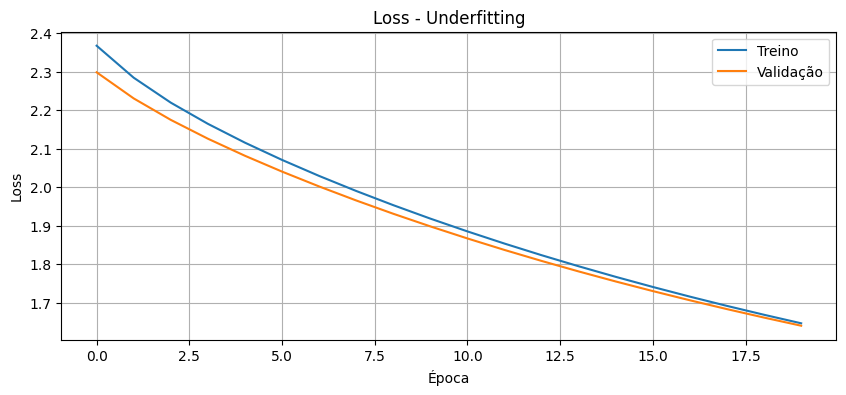

In [ ]:
# Célula 4: Underfitting - Rede muito simples
under_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(10, activation='softmax')
])

# SGD com taxa de aprendizado muito baixa
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)

under_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

train_model(under_model, name="Underfitting", epochs=20, small=True)

Treinando modelo: Overfitting
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7341 - loss: 0.8079 - val_accuracy: 0.8630 - val_loss: 0.3899
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8831 - loss: 0.3223 - val_accuracy: 0.8790 - val_loss: 0.3268
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9204 - loss: 0.2205 - val_accuracy: 0.8827 - val_loss: 0.3346
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9465 - loss: 0.1493 - val_accuracy: 0.8927 - val_loss: 0.3091
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9674 - loss: 0.0894 - val_accuracy: 0.8953 - val_loss: 0.3967
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9825 - loss: 0.0499 - val_accuracy: 0.8887 - val_loss: 0.4202
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9911 - loss: 0.0291 - val_accuracy: 0.8900 - val_loss: 0.4390
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9930 - loss: 0.0222 - val_accuracy: 0.883

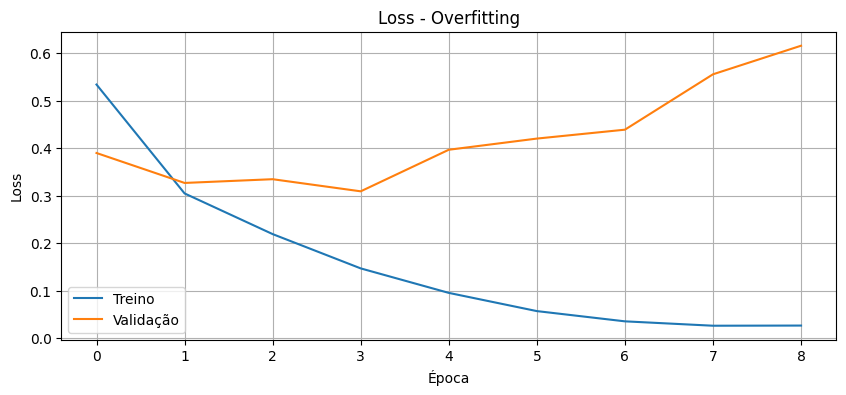

In [ ]:
# Célula 5: Overfitting - Rede complexa sem regularização
over_model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])
over_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

train_model(over_model, "Overfitting", epochs=30, small=True)

Treinando modelo: Goodfitting com regularização L2
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.5658 - loss: 1.1951 - val_accuracy: 0.7748 - val_loss: 0.5889
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.7392 - loss: 0.7325 - val_accuracy: 0.8025 - val_loss: 0.5280
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.7607 - loss: 0.6743 - val_accuracy: 0.8211 - val_loss: 0.5008
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.7811 - loss: 0.6389 - val_accuracy: 0.8372 - val_loss: 0.4789
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.7859 - loss: 0.6180 - val_accuracy: 0.8468 - val_loss: 0.4606
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.7996 - loss: 0.5939 - val_accuracy: 0.8537 - val_loss: 0.4498
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8092 - loss: 0.5822 - val_accuracy: 0.8691 - val_loss: 0.4153
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8142 - loss: 0.5673 - val_accurac

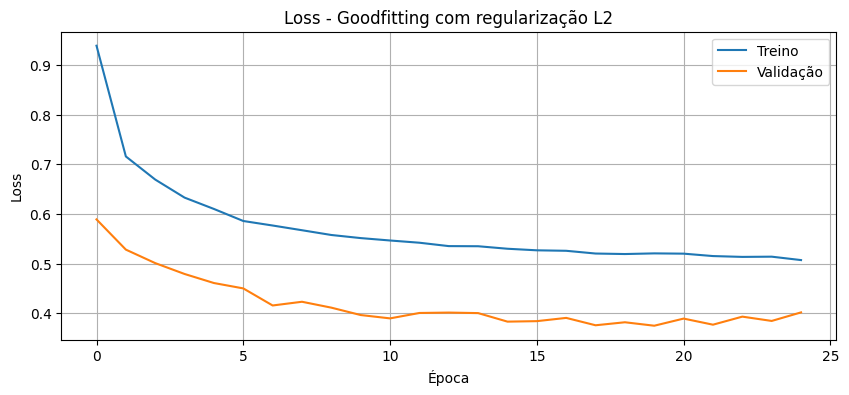

In [ ]:
# Célula 6: Goodfitting - Apenas Regularização L2 + Augmentation
reg_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
                  kernel_regularizer=regularizers.l2(1e-4)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(1e-4)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

reg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

train_model(reg_model, "Goodfitting com regularização L2", epochs=50, data_augmentation=True)
